In [106]:
#Initialisation Cell
import math
import numpy as np
import pandas as pd
import pandas_ta as ta
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [107]:
def hist(data,name,bins):
    plt.hist(data,bins=bins)
    plt.title(name)
    plt.show()

<h2>Import Data</h2>

In [108]:
df = pd.read_csv("GBPUSD_Candlestick_1_M_BID_12.03.2019-12.03.2022.csv")

df

,Local time,Open,High,Low,Close,Volume
0,12.03.2019 00:00:00.000 GMT+0200,1.31887,1.31901,1.31865,1.31887,305.47
1,12.03.2019 00:01:00.000 GMT+0200,1.31889,1.31940,1.31881,1.31936,277.34
2,12.03.2019 00:02:00.000 GMT+0200,1.31939,1.32333,1.31934,1.32321,345.94
3,12.03.2019 00:03:00.000 GMT+0200,1.32321,1.32866,1.32310,1.32845,365.84
4,12.03.2019 00:04:00.000 GMT+0200,1.32845,1.32889,1.32511,1.32536,467.78
...,...,...,...,...,...,...
1128222,11.03.2022 23:55:00.000 GMT+0200,1.30368,1.30386,1.30364,1.30364,46.31
1128223,11.03.2022 23:56:00.000 GMT+0200,1.30363,1.30397,1.30359,1.30362,77.25
1128224,11.03.2022 23:57:00.000 GMT+0200,1.30363,1.30363,1.30361,1.30361,17.17
1128225,11.03.2022 23:58:00.000 GMT+0200,1.30361,1.30398,1.30361,1.30371,62.32


<h2>Clean the Data</h2>

<h3>Get Statistical Summary of the data</h3>

In [109]:
print("The data has the following shape:\n%d rows and %d columns" %(df.shape[0],df.shape[1]))
print(df.head())
print("The statistical summary is given as:")
print(df.describe())
print("Data set consist of the following data types")
df.dtypes

The data has the following shape:
1128227 rows and 6 columns
                         Local time     Open     High      Low    Close  \
0  12.03.2019 00:00:00.000 GMT+0200  1.31887  1.31901  1.31865  1.31887   
1  12.03.2019 00:01:00.000 GMT+0200  1.31889  1.31940  1.31881  1.31936   
2  12.03.2019 00:02:00.000 GMT+0200  1.31939  1.32333  1.31934  1.32321   
3  12.03.2019 00:03:00.000 GMT+0200  1.32321  1.32866  1.32310  1.32845   
4  12.03.2019 00:04:00.000 GMT+0200  1.32845  1.32889  1.32511  1.32536   

   Volume  
0  305.47  
1  277.34  
2  345.94  
3  365.84  
4  467.78  
The statistical summary is given as:
               Open          High           Low         Close        Volume
count  1.128227e+06  1.128227e+06  1.128227e+06  1.128227e+06  1.128227e+06
mean   1.315328e+00  1.315434e+00  1.315222e+00  1.315327e+00  1.187006e+02
std    5.638901e-02  5.637545e-02  5.640176e-02  5.638898e-02  2.821358e+02
min    1.141000e+00  1.141650e+00  1.140950e+00  1.141010e+00  0.000000e+00

Local time     object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
dtype: object

<h3>Remove Useless features</h3>

In [110]:
df = df.drop('Local time',axis=1)

<h3>Remove missing data if any</h3>

In [111]:
missingValuesForOpen = np.where(df["Open"].isnull() == True)
print(missingValuesForOpen)

missingValuesForHigh = np.where(df["High"].isnull() == True)
print(missingValuesForHigh)

missingValuesForLow = np.where(df["Low"].isnull() == True)
print(missingValuesForLow)

missingValuesForClose = np.where(df["Close"].isnull() == True)
print(missingValuesForClose)

missingValuesForVolume = np.where(df["Volume"].isnull() == True)
print(missingValuesForVolume)

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [112]:
df.insert(loc=0,column='bias',value=np.ones((df.shape[0],1)))
df

,bias,Open,High,Low,Close,Volume
0,1.0,1.31887,1.31901,1.31865,1.31887,305.47
1,1.0,1.31889,1.31940,1.31881,1.31936,277.34
2,1.0,1.31939,1.32333,1.31934,1.32321,345.94
3,1.0,1.32321,1.32866,1.32310,1.32845,365.84
4,1.0,1.32845,1.32889,1.32511,1.32536,467.78
...,...,...,...,...,...,...
1128222,1.0,1.30368,1.30386,1.30364,1.30364,46.31
1128223,1.0,1.30363,1.30397,1.30359,1.30362,77.25
1128224,1.0,1.30363,1.30363,1.30361,1.30361,17.17
1128225,1.0,1.30361,1.30398,1.30361,1.30371,62.32


<h3>Feature Scaling</h3>

In [113]:
sx = preprocessing.MinMaxScaler()
scaled_X = np.array(sx.fit_transform(df.drop('Close',axis='columns')))
df['Volume'] = scaled_X[:,3:]
df

,bias,Open,High,Low,Close,Volume
0,1.0,1.31887,1.31901,1.31865,1.31887,0.626874
1,1.0,1.31889,1.31940,1.31881,1.31936,0.627439
2,1.0,1.31939,1.32333,1.31934,1.32321,0.629308
3,1.0,1.32321,1.32866,1.32310,1.32845,0.642572
4,1.0,1.32845,1.32889,1.32511,1.32536,0.649663
...,...,...,...,...,...,...
1128222,1.0,1.30368,1.30386,1.30364,1.30364,0.573923
1128223,1.0,1.30363,1.30397,1.30359,1.30362,0.573747
1128224,1.0,1.30363,1.30363,1.30361,1.30361,0.573817
1128225,1.0,1.30361,1.30398,1.30361,1.30371,0.573817


In [114]:
sy = preprocessing.MinMaxScaler()
scaled_Y = sy.fit_transform(df['Close'].values.reshape(df.shape[0],1))
df['Close'] = scaled_Y
len(scaled_Y)

1128227

<h3>Assess Distribution</h3>

,bias,Open,High,Low,Close,Volume
0,1.0,1.31887,1.31901,1.31865,0.627151,0.060779
1,1.0,1.31889,1.31940,1.31881,0.628879,0.063616
2,1.0,1.31939,1.32333,1.31934,0.642454,0.073013
3,1.0,1.32321,1.32866,1.32310,0.660931,0.139677
4,1.0,1.32845,1.32889,1.32511,0.650035,0.175314
...,...,...,...,...,...,...
1128222,1.0,1.30368,1.30386,1.30364,0.573449,-0.205347
1128223,1.0,1.30363,1.30397,1.30359,0.573378,-0.206234
1128224,1.0,1.30363,1.30363,1.30361,0.573343,-0.205879
1128225,1.0,1.30361,1.30398,1.30361,0.573695,-0.205879


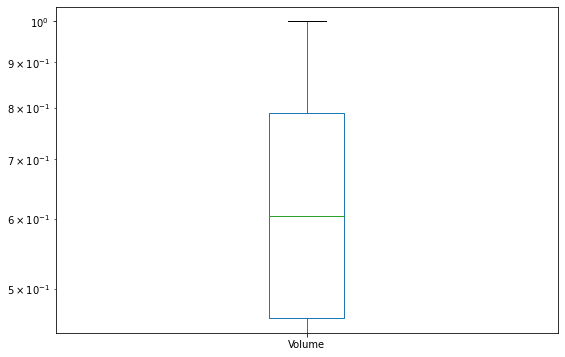

In [115]:
bins = round(math.sqrt(df.shape[0]))
    #Plot Distribution of Open price
#hist(scaled_Y,'Close price',3000)

    #Plot Distribution of High price
#hist(scaled_X[: 1:3],'Others',3000)

    #Plot Distribution of Low price
#df.hist(column="Low", figsize=(9,6),bins=bins)

    #Plot Distribution of Close price
#df.hist(column="Close", figsize=(9,6),bins=bins)

#df["Volume"] = np.power(df["Volume"],0.25)

    #Plot Distribution of Volume price
#df['Volume'].plot(kind='hist',figsize=(9,6),logy=True,bins=1000)
df['Volume'].plot(kind='box',figsize=(9,6),logy=True)
#print(df['Volume'])
#
std = df['Volume'].std()
mean = df['Volume'].mean()

df['Volume'] = (df['Volume']-mean)/std

df

In [153]:
class LinearRegression:
    def __init__(self,feature_samples,labels):
        self.X = feature_samples
        self.Y = labels
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X,self.Y,test_size=0.2)
        self.parameters = np.ones((self.X.shape[1],1))
        
    def Train(self,epochs=None,epsilon=0.2,learning_rate=0.1):
        parameters = self.parameters
        
        
        if epochs != None:
            for epoch in range(epochs):
                ALR = (learning_rate/len(self.Y_train))              #ALR - Average Learning Rate
                h = np.matmul(self.X_train,self.parameters)          #h - hypothesis function
                error = h-self.Y_train
                correction = np.matmul(self.X_train.T,error)
                parameters = parameters - (ALR*correction)
            self.parameters = parameters
            print("After",epochs,"epochs, we have the following parameters:\n",self.parameters)
            
        else:
            print("In else")
            parameters_cur = self.parameters
            parameters_prev = np.zeros((self.X.shape[1],1))
            print()
            while(LA.norm(parameters_cur - parameters_prev) >= epsilon):
                ALR = (learning_rate/len(self.Y_train))              #ALR - Average Learning Rate
                h = np.matmul(self.X_train,self.parameters)          #h - hypothesis function
                error = h-self.Y_train
                correction = np.matmul(self.X_train.T,error)
                parameters_prev = parameters_cur
                parameters_cur = parameters_cur - (ALR*correction)
                print(parameters_cur.T)
                print("Current Norm = ",LA.norm(parameters_cur - parameters_prev))
                #print("Previous Norm = ",norm_prev)
            self.parameters = parameters_cur
            print("After convergence with epsilon =",epsilon,"we get the following parameters:\n",self.parameters)
                
                
    def Test(self):
        return
    
    
    def Predict(self):
        return

In [154]:
model = LinearRegression(scaled_X,scaled_Y)
model.Train(epochs=None)

In else

[[1.         0.91657404 0.91670288 0.91654929 0.99992585]]
Current Norm =  0.1444379719783905
After convergence with epsilon = 0.2 we get the following parameters:
 [[1.        ]
 [0.91657404]
 [0.91670288]
 [0.91654929]
 [0.99992585]]
